**Project Description**
The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables. You need to develop a customer segmentation to define marketing strategy from the dataset.

**Objective**

There are a lot of features in this dataset (18 behavioral features). We will now perform:

Data preprocessing

Clustering

Feature extraction to improve clustering

Experiment with various clustering models: KMeans, Agglomerative Hierarchical, Gaussian Mixture

Choosing the number of clusters

EDA to segment the customers

Concluding the project by giving marketing strategy based on what we learn from the data





**Data Description**

Following is the Data Dictionary for Credit Card dataset:

CUST_ID: Identification of Credit Card holder (Categorical)

BALANCE: Balance amount left in their account to make purchases

BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES: Amount of purchases made from account

ONEOFF_PURCHASES: Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES: Amount of purchase done in installment

CASH_ADVANCE: Cash in advance given by the user

PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY: How frequently the cash in advance being paid

CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"

PURCHASES_TRX: Number of purchase transactions made

CREDIT_LIMIT: Limit of Credit Card for user

PAYMENTS: Amount of Payment done by user

MINIMUM_PAYMENTS: Minimum amount of payments made by user

PRCFULLPAYMENT: Percent of full payment paid by user

TENURE: Tenure of credit card service for user

In [4]:
# import necessary tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

In [5]:
# load the data
data = pd.read_csv('datasets_CC.csv')

In [6]:
# data overview
print('Data shape: ' + str(data.shape))
data.head()

Data shape: (8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Data Cleaning**

First, we check the missing/corrupted values.

In [8]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# impute with median
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].median()
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT'] = data['CREDIT_LIMIT'].median()

In [10]:
# double check
data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Now we drop CUST_ID column, then normalize the input values using StandardScaler().

In [11]:
# drop ID column
data = data.drop('CUST_ID', 1)




In [12]:
# normalize values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled.shape
data_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

In [13]:
data_imputed = pd.DataFrame(data_scaled, columns = data.columns)
data_imputed
#print(type(data_imputed))

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.486217,-0.341250,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.503396,-0.228307,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960378,-0.570615,-0.326875,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097800,-0.580536,-0.338305,0.329200,-4.122768


**Clustering**

**Correlation Check**

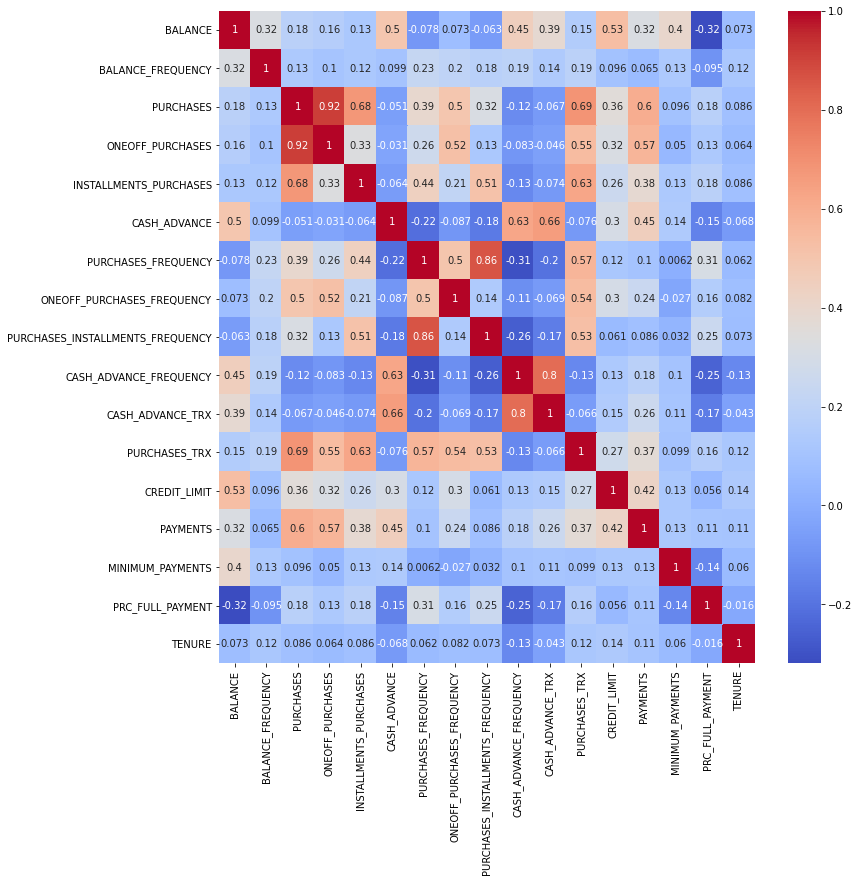

In [12]:
plt.figure(figsize = (12, 12))
sns.heatmap(data_imputed.corr(), annot=True, cmap='coolwarm', 
            xticklabels=data_imputed.columns,
            yticklabels=data_imputed.columns)

**Clustering using K-Means**

In this section we will perform K-Means clustering on the data and check the clustering metrics (inertia, silhouette scores).

In [12]:
# inertia plotter function
def inertia_plot(clust, X, start = 2, stop = 20):
    inertia = []
    for i in range(start,stop):
        km = clust(n_clusters = i)
        labels = km.fit_predict(X)
        inertia.append(km.inertia_)
    plt.figure(figsize = (12,6))
    plt.plot(range(start,stop), inertia, marker = 'o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Inertia plot with K')
    plt.xticks(list(range(start, stop)))
    plt.show()

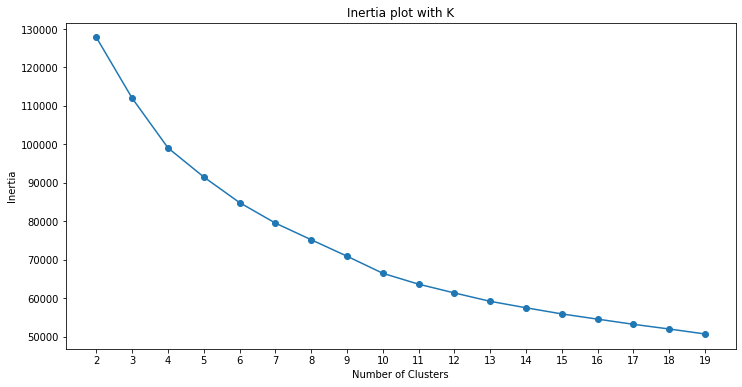

In [13]:
inertia_plot(KMeans, data_imputed)

Using the elbow method, we pick a good number of clusters to be 6.

**Silhouette Scores**

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

We will now check the silhouette scores for different numbers of clusters.

In [14]:
def silh_samp_cluster(clust,  X, start=2, stop=5, metric = 'euclidean'):
    # implementation of silhouette score
    for i in range(start, stop):
        km = clust(n_clusters = i) 
        y_km = km.fit_predict(X)
        print(y_km)
        y_km
        cluster_labels = np.unique(y_km)
        print("cluster labels are",cluster_labels)
        n_clusters = len(cluster_labels)
        #print(y_km)
        print(n_clusters)
        silhouette_vals = silhouette_samples(X, y_km, metric = metric)
        #print("first",silhouette_vals)
        y_ax_lower, y_ax_upper =0,0
        yticks = []
        for i, c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_km == c]
            #print("silhouette_values",c_silhouette_vals)
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)
            #print("uppera axis",y_ax_upper)
            color = cm.jet(float(i)/n_clusters)
            plt.barh(range(y_ax_lower, y_ax_upper),
                    c_silhouette_vals,
                    height=1.0,
                    edgecolor='none',
                    color = color)
            yticks.append((y_ax_lower + y_ax_upper)/2.)
            y_ax_lower+= len(c_silhouette_vals)

        silhouette_avg = np.mean(silhouette_vals)
        plt.axvline(silhouette_avg,
                   color = 'red',
                   linestyle = "--")
        plt.yticks(yticks, cluster_labels+1)
        plt.ylabel("cluster")
        plt.xlabel('Silhouette Coefficient')
        plt.title('Silhouette for ' + str(i) + " Clusters")
        plt.show()

[1 1 0 ... 1 1 1]
cluster labels are [0 1]
2


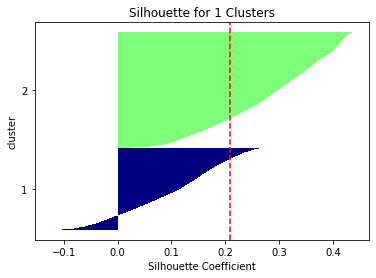

[0 2 0 ... 0 0 0]
cluster labels are [0 1 2]
3


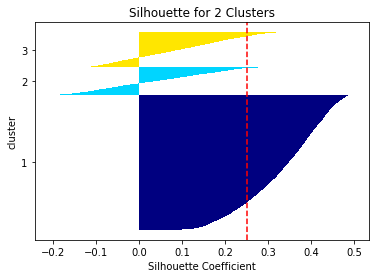

[2 3 1 ... 1 2 2]
cluster labels are [0 1 2 3]
4


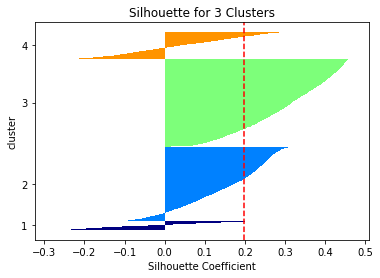

[1 0 3 ... 4 1 1]
cluster labels are [0 1 2 3 4]
5


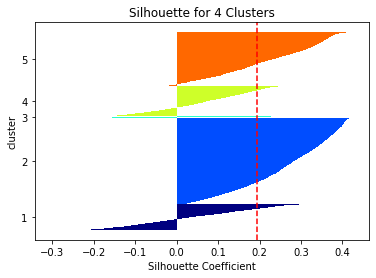

[4 5 0 ... 3 4 4]
cluster labels are [0 1 2 3 4 5]
6


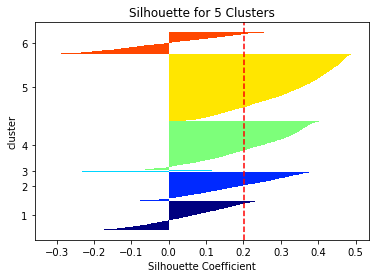

In [15]:
silh_samp_cluster(KMeans, data_imputed, stop=7)

So far, we have a high average inertia, low silhouette scores, and very wide fluctuations in the size of the silhouette plots. This is not good. Let's apply feature extraction with PCA to improve clustering.

**Feature Extraction with PCA**

Clustering Metrics
Now we will apply PCA to improve clustering. We should be able to see lower inertias and higher silhouette scores after feature extraction.

In [16]:
# apply PCA and display clustering metrics
for y in range(2, 5):
    print("PCA with # of components: ", y)
    pca = PCA(n_components=y)
    data_p = pca.fit_transform(data_imputed)
    for i in range(2, 7):
        alg = KMeans(n_clusters = i, )
        label = alg.fit_predict(data_p)
        print('Silhouette-Score for', i,  'Clusters: ', silhouette_score(data_p, label) , '       Inertia: ',alg.inertia_)
    

PCA with # of components:  2
Silhouette-Score for 2 Clusters:  0.4618641168574972        Inertia:  49682.140533156744
Silhouette-Score for 3 Clusters:  0.4520341923209612        Inertia:  33031.46541806273
Silhouette-Score for 4 Clusters:  0.4073674268644334        Inertia:  24544.192525333125
Silhouette-Score for 5 Clusters:  0.3985227754825776        Inertia:  19486.140983303652
Silhouette-Score for 6 Clusters:  0.38361176795837737        Inertia:  16226.00326893751
PCA with # of components:  3
Silhouette-Score for 2 Clusters:  0.3413906390092846        Inertia:  62045.29172197622
Silhouette-Score for 3 Clusters:  0.37940666819486507        Inertia:  46325.32922405174
Silhouette-Score for 4 Clusters:  0.3691125940217785        Inertia:  34659.73739877802
Silhouette-Score for 5 Clusters:  0.3683064406415708        Inertia:  28591.714889598374
Silhouette-Score for 6 Clusters:  0.3313118203743187        Inertia:  24847.692668828153
PCA with # of components:  4
Silhouette-Score for 2 Clu

As you can see, 2 PCA components with 5-6 clusters would be our best bet.

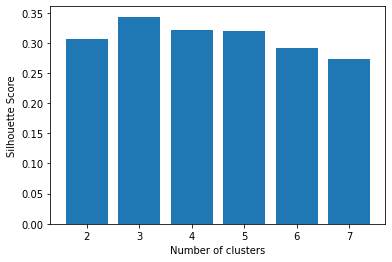

In [17]:
silhouette_scores = [] 
for n_cluster in range(2, 8):
    silhouette_scores.append(   
        silhouette_score(data_p, KMeans(n_clusters = n_cluster).fit_predict(data_p))) 
    
k = [2, 3, 4, 5, 6, 7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()      

Comparing both inertia and silhouette scores we need to select lower inertia and higher silhoutte scores .So 5 and 6 are the optimal number of clusters

Visualization

In [18]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(KMeans(n_clusters = 5,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']
data_p.columns
data_p.head()
print(type(data_p))

#print (pd.DataFrame(pca.components_,columns=data_p.columns,index = ['PC-1','PC-2']))


<class 'pandas.core.frame.DataFrame'>


In [19]:
pca = PCA(n_components=2)
pca.fit_transform(data_imputed)

print (pd.DataFrame(pca.components_,columns=data_imputed.columns,index = ['PC-1','PC-2']))


       BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT    TENURE
PC-1  0.101736           0.120490  ...          0.131833  0.081086
PC-2  0.403818           0.131345  ...         -0.190066 -0.004255

[2 rows x 17 columns]


Text(0, 0.5, 'PC2')

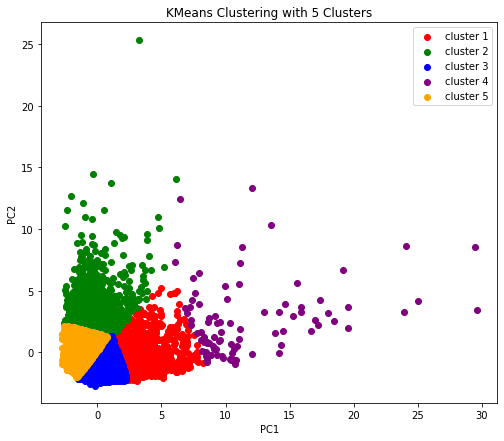

In [20]:
fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(121)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('KMeans Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

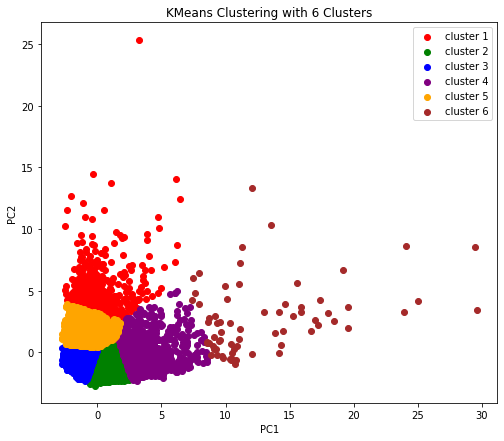

In [21]:
fig = plt.figure(figsize = (18, 7))
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(KMeans(n_clusters = 6,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

plt.subplot(122)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.scatter(data_p[data_p['target']==5].iloc[:,0], data_p[data_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 6')
plt.legend()
plt.title('KMeans Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

**Gaussian Mixture Clustering with PCA**

Text(0, 0.5, 'PC2')

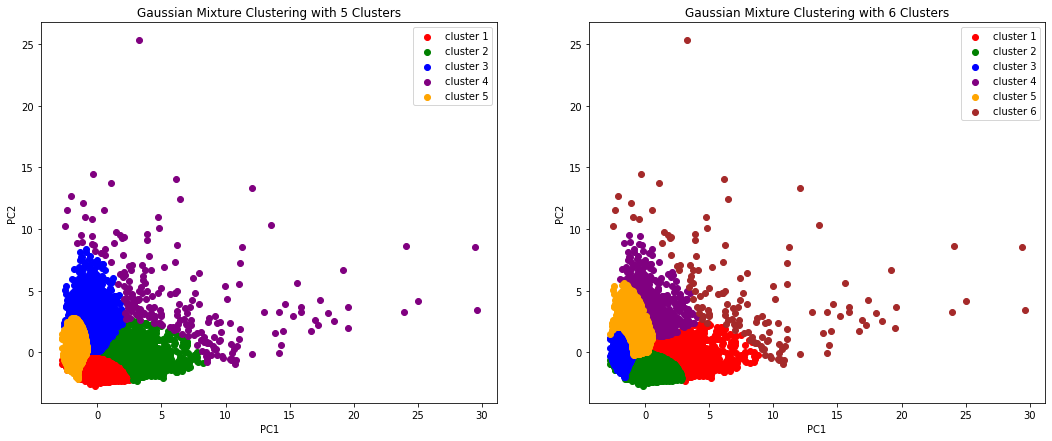

In [22]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(GaussianMixture(n_components = 5,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(121)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('Gaussian Mixture Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(GaussianMixture(n_components = 6,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

plt.subplot(122)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.scatter(data_p[data_p['target']==5].iloc[:,0], data_p[data_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 6')
plt.legend()
plt.title('Gaussian Mixture Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

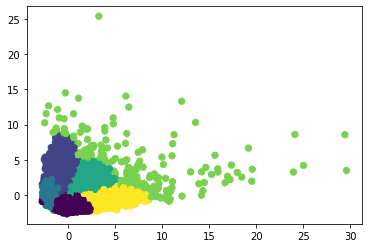

In [23]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
gmm = GaussianMixture(n_components=6).fit(data_p)
labels = gmm.predict(data_p)

plt.scatter(data_p.iloc[:, 0], data_p.iloc[:, 1], c=labels, s=40, cmap='viridis');

But because GMM contains a probabilistic model under the hood, it is also possible to find probabilistic cluster assignments—in Scikit-Learn this is done using the predict_proba method. This returns a matrix of size [n_samples, n_clusters] which measures the probability that any point belongs to the given cluster:

In [24]:
probs = gmm.predict_proba(data_p)
print(probs)
print(probs[:5].round(3))

[[2.77581118e-01 2.09817259e-02 6.79048052e-01 9.64140650e-03
  1.44424987e-04 1.26032729e-02]
 [3.61869712e-08 8.48085407e-01 9.26818574e-02 5.60132349e-02
  3.21913110e-03 3.33797688e-07]
 [6.04720435e-01 5.92536328e-03 5.05965388e-13 1.48460630e-01
  1.24942223e-03 2.39644150e-01]
 ...
 [8.68260736e-01 3.33781803e-02 4.21897018e-02 1.70877744e-02
  2.56142086e-04 3.88274654e-02]
 [2.41540844e-01 3.33887709e-02 6.84842797e-01 2.37572612e-02
  5.79136716e-04 1.58911895e-02]
 [7.93178324e-01 9.05545700e-02 1.07702016e-02 6.15671061e-02
  4.81953238e-04 4.34478451e-02]]
[[0.278 0.021 0.679 0.01  0.    0.013]
 [0.    0.848 0.093 0.056 0.003 0.   ]
 [0.605 0.006 0.    0.148 0.001 0.24 ]
 [0.373 0.224 0.282 0.096 0.001 0.024]
 [0.199 0.024 0.758 0.01  0.    0.008]]


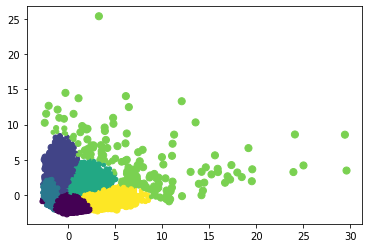

In [25]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(data_p.iloc[:, 0], data_p.iloc[:, 1], c=labels, cmap='viridis', s=size);

Under the hood, a Gaussian mixture model is very similar to k-means: it uses an expectation–maximization approach which qualitatively does the following:

Choose starting guesses for the location and shape

Repeat until converged:

E-step: for each point, find weights encoding the probability of membership in each cluster

M-step: for each cluster, update its location, normalization, and shape based on all data points, making use of the weights

The result of this is that each cluster is associated not with a hard-edged sphere, but with a smooth Gaussian model. Just as in the k-means expectation–maximization approach, this algorithm can sometimes miss the globally optimal solution, and thus in practice multiple random initializations are used.

Let's create a function that will help us visualize the locations and shapes of the GMM clusters by drawing ellipses based on the GMM output:

In [26]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, data_p, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(data_p).predict(data_p)
    if label:
        ax.scatter(data_p.iloc[:, 0], data_p.iloc[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(data_p.iloc[:, 0], data_p.iloc[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covars, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covars, alpha=w * w_factor)

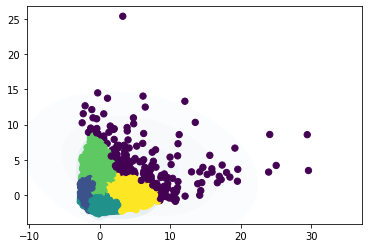

In [27]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5, random_state=42)
plot_gmm(gmm, data_p )

In [28]:
rng = np.random.RandomState(13)
X_stretched = np.dot(data_p, rng.randn(2, 2))

In [29]:
from matplotlib.patches import Ellipse

def draw_ell(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gm(gmm, data_p, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(data_p).predict(data_p)
    if label:
        ax.scatter(data_p[:, 0], data_p[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(data_p[:, 0], data_p[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covars, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ell(pos, covars, alpha=w * w_factor)

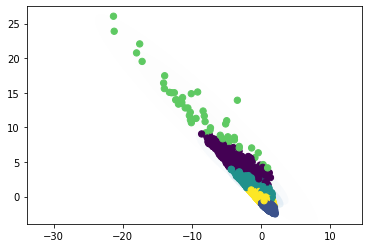

In [30]:
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
plot_gm(gmm, X_stretched)

Getting the important feature which contributes in clustering


In [31]:
model = PCA(n_components=2).fit(data_imputed)
X_pc = model.transform(data_imputed)
# number of components
n_pcs= model.components_.shape[0]
print(n_pcs)
print(model.components_)

2
[[ 0.10173531  0.12049028  0.41156249  0.34633416  0.33676114 -0.0228096
   0.3212323   0.29449273  0.27449426 -0.08858192 -0.04813587  0.39059838
   0.211916    0.26648146  0.06326855  0.13183292  0.08108568]
 [ 0.40382081  0.13134342  0.04002515  0.06191771 -0.01917413  0.43902808
  -0.19114726 -0.01855983 -0.17886892  0.43412171  0.41964171 -0.02017016
   0.23802651  0.25671513  0.16906508 -0.1900649  -0.0042548 ]]


In [32]:
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
print(most_important)

print

[2, 5]


<function print>

In [33]:
initial_feature_names = data_imputed.columns
print(type(initial_feature_names))
print(initial_feature_names[2])
print(initial_feature_names[5])
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
print("names",most_important_names)
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

df

<class 'pandas.core.indexes.base.Index'>
PURCHASES
CASH_ADVANCE
names ['PURCHASES', 'CASH_ADVANCE']


,0,1
0,PC0,PURCHASES
1,PC1,CASH_ADVANCE


**Agglomerative clustering - Hierarchical clustering**

In [34]:
import scipy.cluster.hierarchy as shc 
from sklearn.preprocessing import StandardScaler, normalize 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(data) 
  
# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

In [35]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

Dendograms are used to divide a given cluster into many different clusters.
 Visualizing the working of the Dendograms

In [ ]:
plt.figure(figsize =(12, 12)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

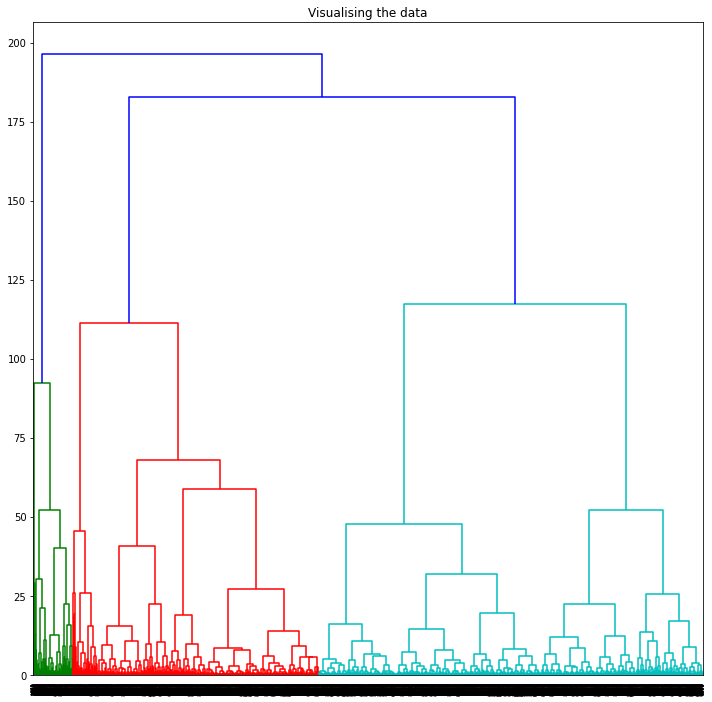

In [48]:
plt.figure(figsize =(12, 12)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(data_p, method ='ward'))) 

From the above diagram it can be noticed the number of cluster is 2 

**Agglomerative Hierarchical Clustering with PCA**

Text(0, 0.5, 'PC2')

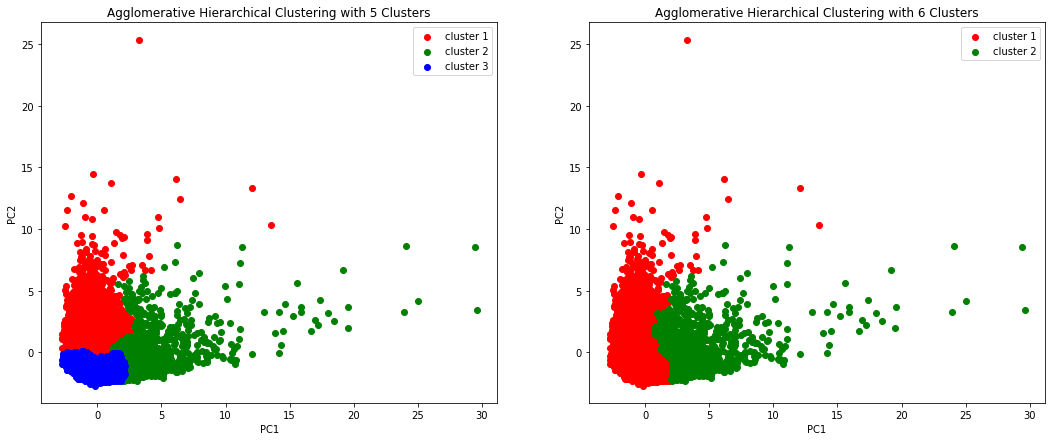

In [60]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(AgglomerativeClustering(n_clusters = 3,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(121)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
#plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
#plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('Agglomerative Hierarchical Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(AgglomerativeClustering(n_clusters = 2,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

plt.subplot(122)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
#plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
#plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
#plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
#plt.scatter(data_p[data_p['target']==5].iloc[:,0], data_p[data_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 6')
plt.legend()
plt.title('Agglomerative Hierarchical Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

As though dendrogram will give us nor of cluster as 2, we have choosen nor of cluster as 5 or 6 because of silhouette score

Calculating Silhouette scores for all the models 

In [67]:
scaler=StandardScaler()
df_scl=scaler.fit_transform(data)

# Normalization refers to rescaling real valued numeric attributes into the range 0 and 1.
# It is useful to scale the input attributes for a model that relies on the magnitude of values, such as distance measures used in unsupervised learning.
norm=normalize(df_scl)

# We can apply both (StandartScaler and Normalize) on our data before clustering. 
df_norm=pd.DataFrame(norm)

from sklearn.preprocessing import StandardScaler, normalize 
pca = PCA(n_components=2)
data_pr = pca.fit_transform(df_norm)
type(data_pr)
sil_data = pd.DataFrame(data_pr)
sil_data
data_pr



 

array([[-0.49044342, -0.67923767],
       [-0.51854147,  0.54528071],
       [ 0.33093891,  0.2690246 ],
       ...,
       [ 0.1886854 , -0.24860457],
       [-0.313195  , -0.17134572],
       [ 0.0128604 ,  0.09744277]])

In [68]:
kmeans_ = KMeans(n_clusters=8, random_state=40).fit_predict(data_pr)
gmm_    = GaussianMixture(n_components=5, covariance_type='full', random_state=40).fit_predict(data_pr)
hierarchical_= AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=3).fit_predict(data_pr)

In [71]:
kmeansSilhouette_Score = metrics.silhouette_score(data_pr,kmeans_, metric='euclidean')
GMM_Silhouette_Score   = metrics.silhouette_score(data_pr, gmm_, metric='euclidean')
Hierarchical_Silhouette_Score = metrics.silhouette_score(data_pr, hierarchical_, metric='euclidean')

In [72]:
Clustering_Silhouette_Scores  = [ ['KMeans',kmeansSilhouette_Score ], ['GMM', GMM_Silhouette_Score],
                                ['Hierarchical',Hierarchical_Silhouette_Score ]]

Clustering_Silhouette_Scores  = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
2,Hierarchical,0.438139
0,KMeans,0.402680
1,GMM,0.334173


**Exploratory Data Analysis**

We are picking 6 clusters for this EDA. Let's make a Seaborn pairplot with selected/best columns to show how the clusters are segmenting the samples:

In [14]:
# select best columns
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]

# dataframe with best columns
data_final = pd.DataFrame(data_imputed[best_cols])

print('New dataframe with best columns has just been created. Data shape: ' + str(data_final.shape))

New dataframe with best columns has just been created. Data shape: (8950, 6)


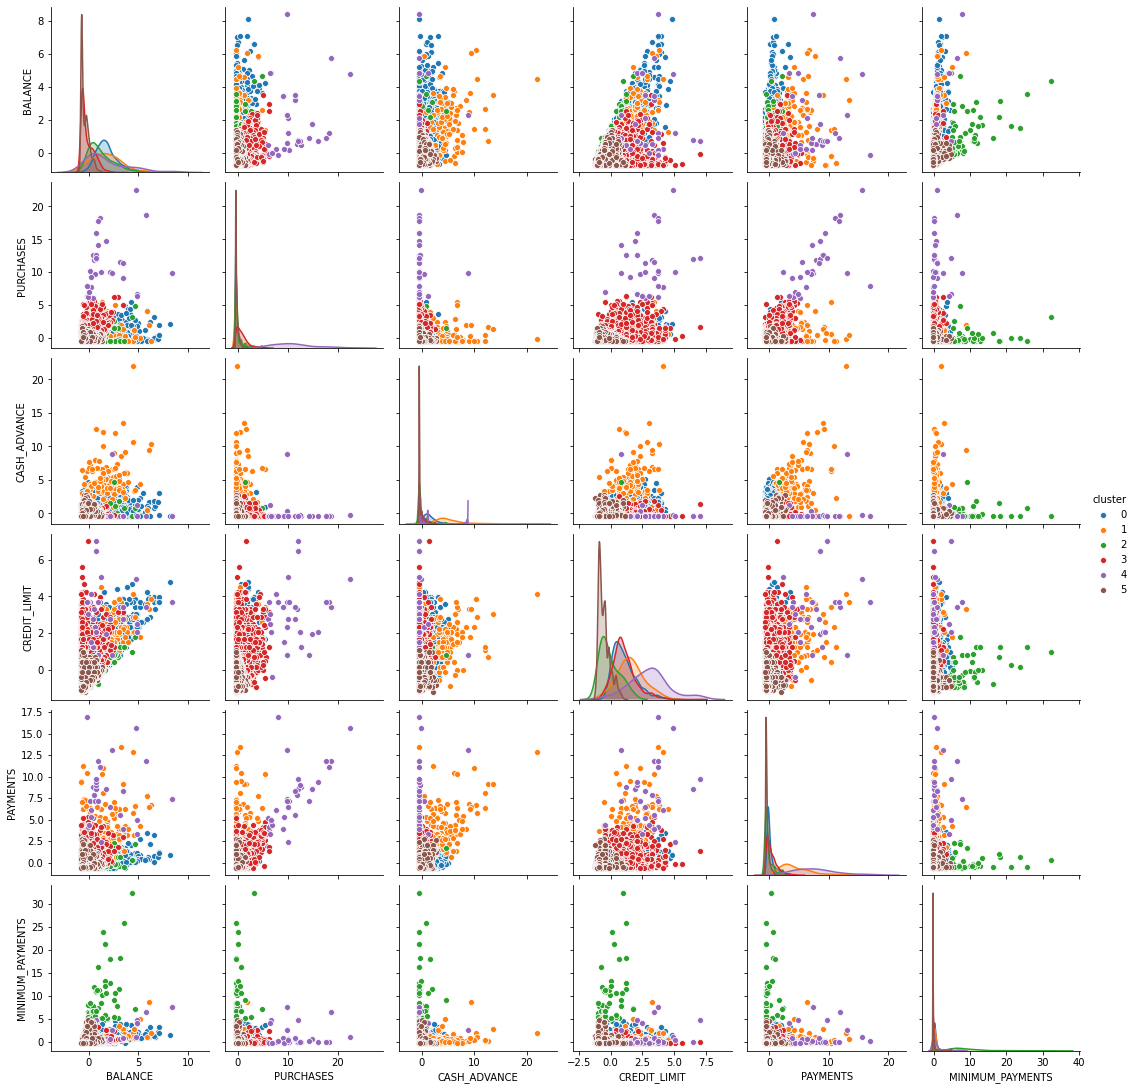

In [15]:
# apply KMeans clustering
alg = KMeans(n_clusters = 6)
label = alg.fit_predict(data_final)

# create a 'cluster' column
data_final['cluster'] = label
best_cols.append('cluster')

# make a Seaborn pairplot
sns.pairplot(data_final[best_cols], hue='cluster')

**Cluster 0 (Blue): The Average Joe**

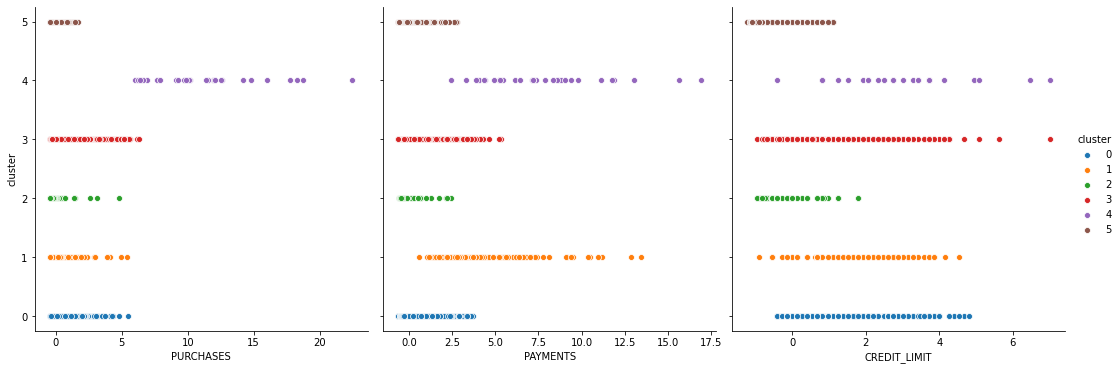

In [16]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT'],
            y_vars=['cluster'],
            height=5, aspect=1)

This group of users, while having the highest number of users by far, is fairly frugal: they have lowest purchases, second lowest payments, and lowest credit limit. The bank would not make much profit from this group, so there should be some sorts of strategy to attract these people more.

**Cluster 1 (Orange): The Active Users**

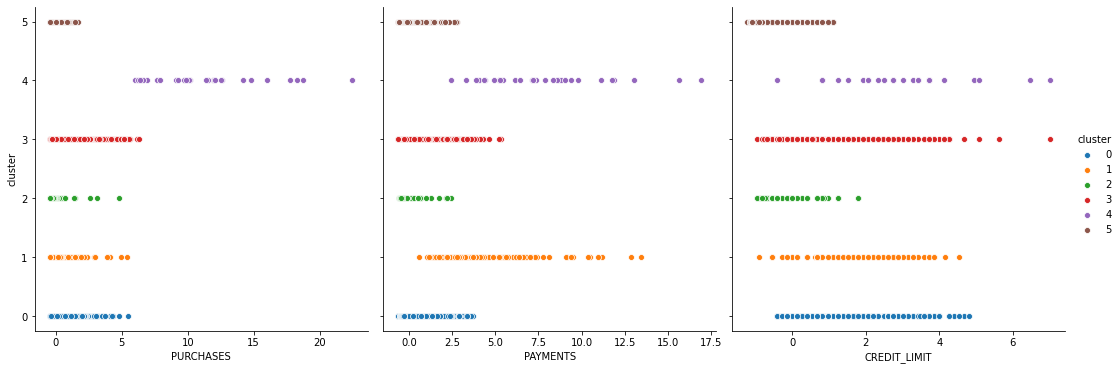

In [17]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT'],
            y_vars=['cluster'],
            height=5, aspect=1)

This group of users is very active in general: they have second highest purchases, third highest payments, and the most varied credit limit values. This type of credit card users is the type you should spend the least time and effort on, as they are already the ideal one.

**Cluster 2 (Green): The Big Spenders**

The Big Spenders. This group is by far the most interesting to analyze, since they do not only have the highest number of purchases, highest payments, highest minimum payments, but the other features are also wildly varied in values. Let's take a quick look at the pairplots.

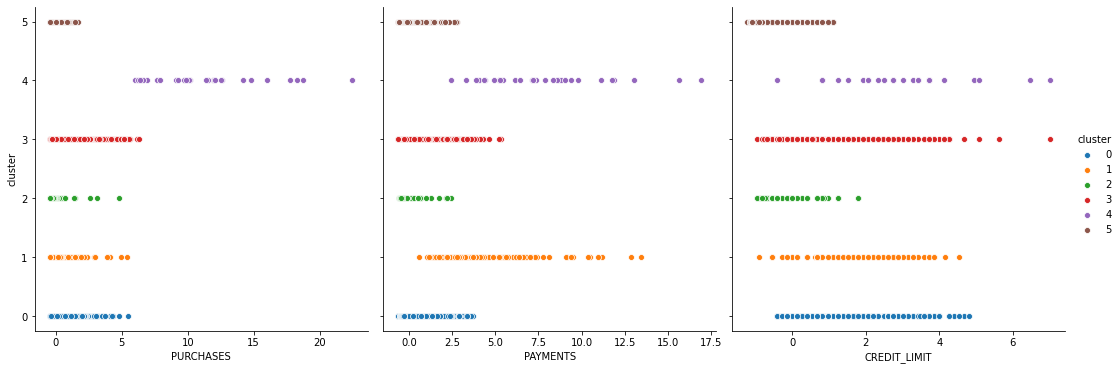

In [18]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT'], y_vars=['cluster'],
            height=5, aspect=1)

As a nature of the "Big Spenders", there are many outliers in this cluster: people who have/make abnormally high balance, purchases, cash advance, and payment. The graph below will give you an impression of how outlier-heavy this cluster is - almost all the green dots are outliers relatively compared to the rest of the whole dataset.



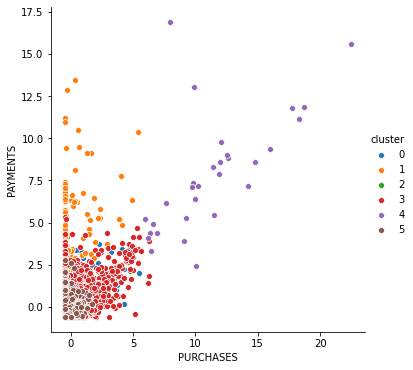

In [20]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['PURCHASES'], y_vars=['PAYMENTS'],
            height=5, aspect=1)

**Cluster 3 (Red): The Money Borrowers**

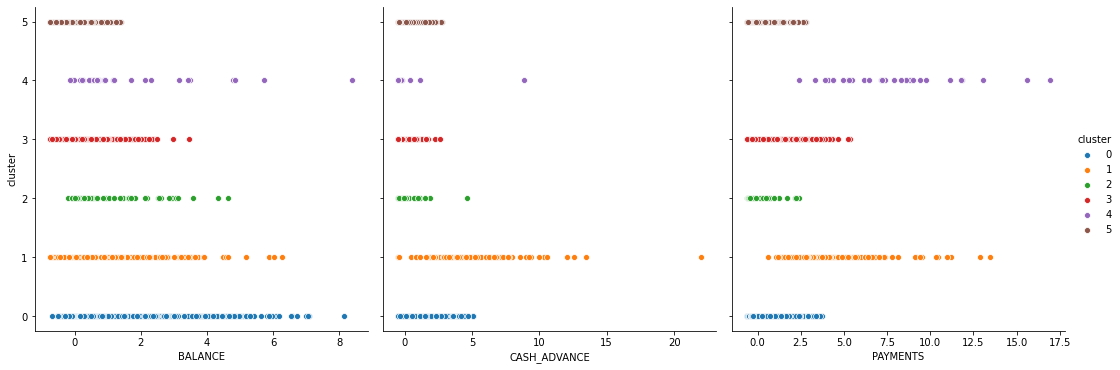

In [21]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['BALANCE', 'CASH_ADVANCE', 'PAYMENTS'],
            y_vars=['cluster'],
            height=5, aspect=1)

Wildly varied balance, second highest payments, average purchases. The special thing about this cluster is that these people have the highest cash advance by far - there is even one extreme case that has like 25 cash advance points. We call these people "The Money Borrowers".

**Cluster 4 (Purple): The High Riskers**

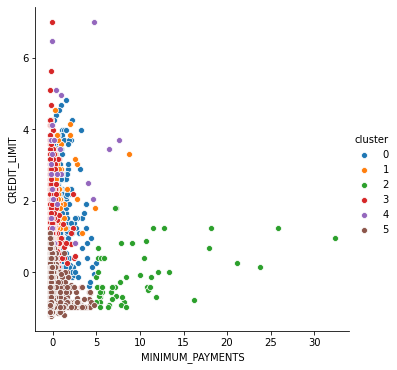

In [22]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['MINIMUM_PAYMENTS'], y_vars=['CREDIT_LIMIT'],
            height=5, aspect=1)

This group has absurdly high minimum payments while having the second lowest credit limit. It looks like the bank has identified them as higher risk.

**Cluster 5 (Brown): The Wildcards**

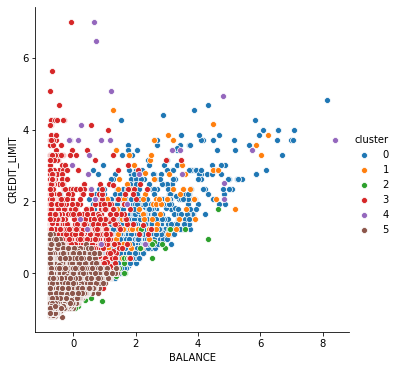

In [23]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['BALANCE'], y_vars=['CREDIT_LIMIT'],
            height=5, aspect=1)

This group is troublesome to analyze and to come up with a good marketing strategy towards, as both their credit limit and balance values are wildly varied. As you can see, the above graph looks like half of it was made of the color brown